# Semester Project

Name: **Tony Nguyen**

Class: CPSC 322

Term: Fall 2023

In [1]:
from data_table import *
from data_util import *
from data_learn import *
from data_eval import *

# Introduction

I plan to build a classifier that predicts whether a person’s loan is high risk, medium risk, or low risk for default. The classifier uses two datasets: one is the Credit Risk Analysis on [Kaggle]( https://www.kaggle.com/datasets/ranadeep/credit-risk-dataset?rvi=1) and the Zillow Home Value Index on Zillow’s [home data]( https://www.zillow.com/research/data/). Both datasets will be merged on the zip code. Since housing price trends can impact borrowers' ability to pay their loans, I plan to calculate them and factor them into the classifier training. 

It turns out after testing several approaches, the classifers all return a high accuracy score. However, high accuracy does not always mean good. In this case, the classifier predicts the majority class (low risk) most of the time, which fails to classify the level of risk of a person.

# Data Analysis

## Credit Risk Analysis Dataset

### Load Data


This dataset contains extensive information about relevant real life credit risk factors. Based on the description on Kaggle, the dataset was a real data from a financial institution. The dataset is also relatively large, with 887,379 rows and 34 attributes, which is as follows:
* **id**: A unique identifier for the loan listing.
* **loan_amnt**: The amount of the loan applied for by the borrower.
* **term**: The number of payments on the loan. Values are in months and can be either 36 or 60.
* **int_rate**: Interest Rate on the loan.
* **installment**: The monthly payment owed by the borrower if the loan originates. Either 36 or 60 months.
* **grade**: Loan grade assigned by the loaner. Possible values are from A-G.
* **emp_length**: Employment length in years. 
* **home_ownership**: The home ownership status provided by the borrower during registration. Possible values are: RENT, OWN, MORTGAGE, OTHER.
* **annual_inc**: The self-reported annual income provided by the borrower.
* **verification_status**: Indicates if the borrower's income was verified by the loaner. Possible values are: Verified, Source Verified, Not Verified.
* **issue_d**: The month-year which the loan was funded. Possible values lay between Jan 2008 - Dec 2015.
* **loan_status**: Current status of the loan.
* **pymnt_plan**: Indicates if a payment plan has been put in place for the loan. Possible values are: y = yes, n = no.
* **zip_code**: The first 3 numbers of the zip code provided by the borrower in the loan application.
* **addr_state**: The state provided by the borrower in the loan application.
* **dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* **delinq_2yrs**: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
* **earliest_cr_line**: The month-year the borrower's earliest reported credit line was opened.
* **inq_last_6mths**: The number of inquiries in past 6 months (excluding auto and mortgage inquiries).
* **open_acc**: The number of open credit lines in the borrower's credit file.
* **revol_bal**: Total credit revolving balance.
* **revol_util**:  Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* **total_acc**: The total number of credit lines currently in the borrower's credit file.
* **out_prncp**: Remaining outstanding principal for total amount funded.
* **total_pymnt**: Payments received to date for total amount funded.
* **total_rec_prncp**: Principal received to date.
* **total_rec_int**: Interest received to date.
* **total_rec_late_fee**: Late fees received to date.
* **recoveries**: Post charge off gross recovery.
* **collection_recovery_fee**: Post charge off collection fee.
* **last_pymnt_d**: Last month payment was received.
* **last_pymnt_amnt**: Last total payment amount received.
* **next_pymnt_d**: Next scheduled payment date.
* **last_credit_pull_d**: The most recent month the loan company pulled credit for this loan.

These information is probably more than enough to build a classifier that predicts the risk of a loan. However, I do not plan to use all of them as it will be expensive. I reckon that the large amount of data will be a challenge for this project. In addition to that, I also plan to merge this dataset with the Zillow Home Value Index dataset to see if housing price trends can impact borrowers' ability to pay their loans.

In [2]:
credit_original = DataTable(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d'])
credit_original.load('dataset/loan_trimmed.csv')
credit_original.rows(range(10))

     id    loan_amnt  term         int_rate    installment  grade    emp_length    home_ownership      annual_inc  verification_status    issue_d    loan_status    pymnt_plan    zip_code    addr_state      dti    delinq_2yrs  earliest_cr_line      inq_last_6mths    open_acc    revol_bal    revol_util    total_acc    out_prncp    total_pymnt    total_rec_prncp    total_rec_int    total_rec_late_fee    recoveries    collection_recovery_fee  last_pymnt_d      last_pymnt_amnt  next_pymnt_d    last_credit_pull_d
-------  -----------  ---------  ----------  -------------  -------  ------------  ----------------  ------------  ---------------------  ---------  -------------  ------------  ----------  ------------  -----  -------------  ------------------  ----------------  ----------  -----------  ------------  -----------  -----------  -------------  -----------------  ---------------  --------------------  ------------  -------------------------  --------------  -----------------  ---------

### Discretize Data

The dataset comes in different data type, so I will need to convert them into something more similar consistent with each other. I will go ahead and discretize the data first:

Since this project wants to predict the `loan_status`, I encode Credit Risk Analysis's `loan_status` as follows:
* **High risk, *Denote as 3***: Charged Off, Default, Late (16-30 days), Late (31-120 days).
* **Medium risk, *Denote as 2***: Issued, In Grace Period
* **Low risk, *Denote as 1***: Current, Fully Paid.

In [6]:
while credit_original.get_column_data('loan_status').count('Does not meet the credit policy. Status:Fully Paid') > 0 or credit_original.get_column_data('loan_status').count('Does not meet the credit policy. Status:Charged Off') > 0:
    for i in range(credit_original.row_count()):
        try:
            if (credit_original[i]['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid'
                or credit_original[i]['loan_status'] == 'Does not meet the credit policy. Status:Charged Off'):
                del credit_original[i]
        except IndexError:
            break

In [7]:
high = 0
medium = 0
low = 0

for i in range(credit_original.row_count()):
    if credit_original[i]['loan_status'] == 'Fully Paid' or credit_original[i]['loan_status'] == 'Current':
        credit_original[i]['loan_status'] = 1
        low += 1
    elif credit_original[i]['loan_status'] == 'Issued' or credit_original[i]['loan_status'] == 'In Grace Period':
        credit_original[i]['loan_status'] = 2
        medium += 1
    elif (credit_original[i]['loan_status'] == 'Late (16-30 days)' or credit_original[i]['loan_status'] == 'Late (31-120 days)'
            or credit_original[i]['loan_status'] == 'Default' or credit_original[i]['loan_status'] == 'Charged Off'):
        credit_original[i]['loan_status'] = 3
        high += 1

In [8]:
credit_original.rows(range(10))

     id    loan_amnt  term         int_rate    installment  grade    emp_length    home_ownership      annual_inc  verification_status    issue_d      loan_status  pymnt_plan    zip_code    addr_state      dti    delinq_2yrs  earliest_cr_line      inq_last_6mths    open_acc    revol_bal    revol_util    total_acc    out_prncp    total_pymnt    total_rec_prncp    total_rec_int    total_rec_late_fee    recoveries    collection_recovery_fee  last_pymnt_d      last_pymnt_amnt  next_pymnt_d    last_credit_pull_d
-------  -----------  ---------  ----------  -------------  -------  ------------  ----------------  ------------  ---------------------  ---------  -------------  ------------  ----------  ------------  -----  -------------  ------------------  ----------------  ----------  -----------  ------------  -----------  -----------  -------------  -----------------  ---------------  --------------------  ------------  -------------------------  --------------  -----------------  ---------

### Data Cleaning and Normalization

In order to get the data ready for training, I will need to clean the data and normalize them. I will start by removing the columns that are not relevant to the project. I will also remove the rows that have missing values.

#### `term` attribute

`term` attribute is shown in months, so we need to remove the "months" string and convert the attribute to an integer. This is performed so that the attribute name is consistent across all datasets.

In [9]:
term_attr = credit_original.get_column_data('term')
for i in range(credit_original.row_count()):
    credit_original[i]['term'] = int(credit_original[i]['term'][:2])
print('Unique values in term: ', set(credit_original.get_column_data('term')))

Unique values in term:  {36, 60}


#### `grade` attribute
The `grade` attribute is a categorical attribute, so I will need to convert it to a numerical attribute. I will use the following mapping:
* **A**: 1
* **B**: 2
* **C**: 3
* **D**: 4
* **E**: 5
* **F**: 6
* **G**: 7

In [10]:
for i in range(credit_original.row_count()):
    if credit_original[i]['grade'] == 'A':
        credit_original[i]['grade'] = 1
    elif credit_original[i]['grade'] == 'B':
        credit_original[i]['grade'] = 2
    elif credit_original[i]['grade'] == 'C':
        credit_original[i]['grade'] = 3
    elif credit_original[i]['grade'] == 'D':
        credit_original[i]['grade'] = 4
    elif credit_original[i]['grade'] == 'E':
        credit_original[i]['grade'] = 5
    elif credit_original[i]['grade'] == 'F':
        credit_original[i]['grade'] = 6
    elif credit_original[i]['grade'] == 'G':
        credit_original[i]['grade'] = 7
print('Unique values in grade: ', set(credit_original.get_column_data('grade')))

Unique values in grade:  {1, 2, 3, 4, 5, 6, 7}


#### `emp_length` attribute
The `emp_length` attribute is also a categorical attribute, so I will need to convert it to a numerical attribute. I will use the following mapping:
* **-1**: Not available
* **0**: Less than 1 year
* **1**: 1 year
* **2**: 2 years
...
* **10**: 10+ years

In [11]:
emp_length_attr = credit_original.get_column_data('emp_length')
for i in range(credit_original.row_count()):
    if credit_original[i]['emp_length'] == 'n/a':
        credit_original[i]['emp_length'] = -1
    elif credit_original[i]['emp_length'] == '< 1 year':
        credit_original[i]['emp_length'] = 0
    elif credit_original[i]['emp_length'] == '10+ years':
        credit_original[i]['emp_length'] = 10
    else:
        credit_original[i]['emp_length'] = int(credit_original[i]['emp_length'][:2])
print('Unique values in emp_length after cleaning: ', set(credit_original.get_column_data('emp_length')))

Unique values in emp_length after cleaning:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}


#### `home_ownership` attribute
Encode `home_ownership` as follows:
* **0**: None
* **1**: Mortgage
* **2**: Rent
* **3**: Own
* **4**: Other
* **5**: Any

In [12]:
home_ownership_attr = credit_original.get_column_data('home_ownership')
for i in range(credit_original.row_count()):
    if credit_original[i]['home_ownership'] == 'NONE':
        credit_original[i]['home_ownership'] = 0
    elif credit_original[i]['home_ownership'] == 'MORTGAGE':
        credit_original[i]['home_ownership'] = 1
    elif credit_original[i]['home_ownership'] == 'RENT':
        credit_original[i]['home_ownership'] = 2
    elif credit_original[i]['home_ownership'] == 'OWN':
        credit_original[i]['home_ownership'] = 3
    elif credit_original[i]['home_ownership'] == 'OTHER':
        credit_original[i]['home_ownership'] = 4
    elif credit_original[i]['home_ownership'] == 'ANY':
        credit_original[i]['home_ownership'] = 5
print('Unique values in home_ownership after cleaning: ', set(credit_original.get_column_data('home_ownership')))

Unique values in home_ownership after cleaning:  {0, 1, 2, 3, 4, 5}


#### `verification_status` attribute

Encode `verification_status` as follows:
* **0**: Not Verified
* **1**: Verified
* **2**: Source Verified

In [13]:
for i in range(credit_original.row_count()):
    if credit_original[i]['verification_status'] == 'Not Verified':
        credit_original[i]['verification_status'] = 0
    elif credit_original[i]['verification_status'] == 'Source Verified':
        credit_original[i]['verification_status'] = 1
    elif credit_original[i]['verification_status'] == 'Verified':
        credit_original[i]['verification_status'] = 2
print('Unique values in verification_status after cleaning: ', set(credit_original.get_column_data('verification_status')))

Unique values in verification_status after cleaning:  {0, 1, 2}


#### `issue_d` attribute
For this attribute, I will check the data to make sure the values are conformed in the YY-MM format

In [14]:
issue_d_attr = credit_original.get_column_data('issue_d')
for i in range(len(issue_d_attr)):
    try:
        period = issue_d_attr[i].split('-')
    except:
        print(f'Error in row {i}: ', credit_original[i])

    if len(period[0]) == 1:
        credit_original[i]['last_pymnt_d'] = '0' + issue_d_attr[i]
    
    if len(period[1]) != 3:
        print(f'Error in row {i}: ', credit_original[i])

#### `pymnt_plan` attribute
I will encode `pymnt_plan` as follows:
* **0**: No
* **1**: Yes

In [16]:
for i in range(credit_original.row_count()):
    if credit_original[i]['pymnt_plan'] == 'n':
        credit_original[i]['pymnt_plan'] = 0
    elif credit_original[i]['pymnt_plan'] == 'y':
        credit_original[i]['pymnt_plan'] = 1
print('Unique values in `pymnt_plan` attribute: ', set(credit_original.get_column_data('pymnt_plan')))

Unique values in `pymnt_plan` attribute:  {0, 1}


#### `last_pymt_d` attribute
Convert the attribute so that the values are conformed in the YY-MMM format

In [17]:
last_pymnt_attr = credit_original.get_column_data('last_pymnt_d')
for i in range(len(last_pymnt_attr)):
    try:
        period = last_pymnt_attr[i].split('-')
    except:
        print(f'Error in row {i}: ', credit_original[i])

    if len(period[0]) == 1:
        credit_original[i]['last_pymnt_d'] = '0' + last_pymnt_attr[i]
    
    if len(period[1]) != 3:
        print(f'Error in row {i}: ', credit_original[i])

### Data Visualization
#### Ammount of Different Loan Status

The result below illustrates the total number of different loan risk. This dataset is highly skewed towards low risk loans. This might be a problem as the classifier will be biased towards low risk loans. I will need to be careful when selecting the training and testing sets.

In [18]:
print("Number of High Risk: " + str(high) + ", corresponding to " + str(round(high / credit_original.row_count() * 100, 2)) + "% of the dataset")
print("Number of Medium Risk: " + str(medium) + ", corresponding to " + str(round(medium / credit_original.row_count() * 100, 2)) + "% of the dataset")
print("Number of Low Risk: " + str(low) + ", corresponding to " + str(round(low / credit_original.row_count() * 100, 2)) + "% of the dataset")

Number of High Risk: 60415, corresponding to 6.83% of the dataset
Number of Medium Risk: 14713, corresponding to 1.66% of the dataset
Number of Low Risk: 809502, corresponding to 91.51% of the dataset


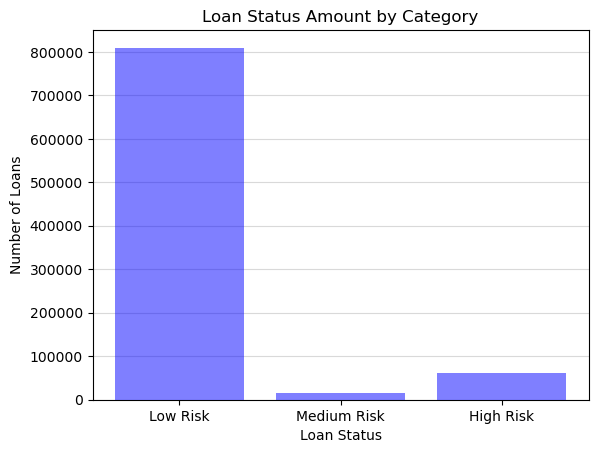

In [19]:
bar_chart([low, medium, high], ['Low Risk', 'Medium Risk', 'High Risk'], 'Loan Status', 'Number of Loans', 'Loan Status Amount by Category')

The figure above, Figure 1 of the Loan Status Amount by Category, highlights a big skew in the dataset. This will have a big impact on the classifier as it will most liklely be biased towards low risk loans. I will need to be careful when selecting the training and testing sets.

#### Loan Amount Distribution

The graph below suggests that the loan amount is skewed towards the left. This means that most of the loans are small, between $2,500 and $17,000. 


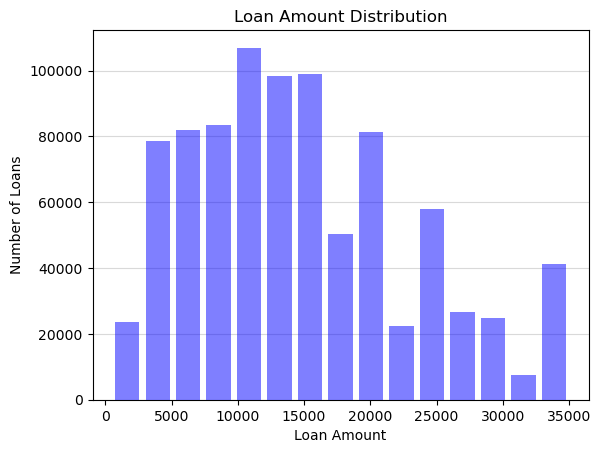

In [20]:
histogram(credit_original, 'loan_amnt', 15, 'Loan Amount', 'Number of Loans', 'Loan Amount Distribution')

Figure 2, Loan Amount Distribution

#### Loan Amount Distribution by Loan Status
The distribution of the loan amount by loan status is similar to the overall distribution, with the median values of each loan status being around $13,000 and $15,000.

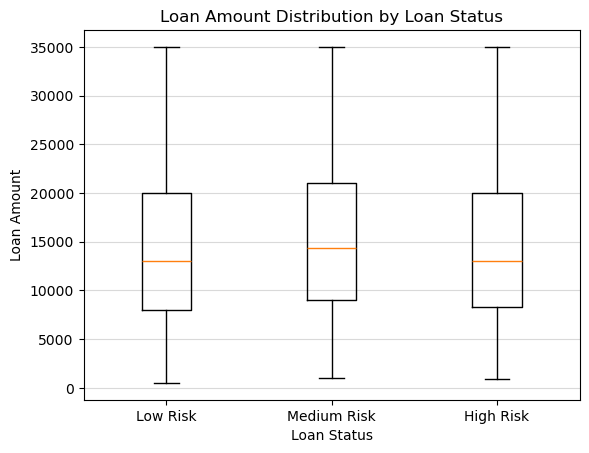

In [21]:
loan_amnt_col = credit_original.get_column_data('loan_amnt')
loan_status_col = credit_original.get_column_data('loan_status')

loan_amnt_low_risk = [loan_amnt_col[i] for i in range(len(loan_amnt_col)) if loan_status_col[i] == 1]
loan_amnt_medium_risk = [loan_amnt_col[i] for i in range(len(loan_amnt_col)) if loan_status_col[i] == 2]
loan_amnt_high_risk = [loan_amnt_col[i] for i in range(len(loan_amnt_col)) if loan_status_col[i] == 3]

box_plot([loan_amnt_low_risk, loan_amnt_medium_risk, loan_amnt_high_risk], ['Low Risk', 'Medium Risk', 'High Risk'], 'Loan Status', 'Loan Amount', 'Loan Amount Distribution by Loan Status')

Figure 3, Loan Amount Distribution by Loan Status. We see that the distribution is pretty similar across all loan status.

## Zillow Home Value Index Dataset

The Zillow Home Value Index dataset contains the median home value index for each zip code in the United States. The dataset contains 294 attributes and 26,368 instances. The first 7 attributes are location details, while the remaining 285 attributes are the median home value index for each month from 2000 to 2023. Here are the following attributes:
* **RegionID**: Unique identifier for the region.
* **SizeRank**: Rank of the region based on median home value index.
* **RegionName**: Zip code.
* **City**: City name.
* **StateName**: State name.
* **Metro**: Metro area name.
* **CountyName**: County name.

For the remaining 285 attributes, the attribute name is the month-year of the median home value index. And since the Credit Risk dataset only contains data from 2007 to 2015, I will remove those attributes that are not within the range from the Zillow dataset. After all, there are 110 attributes left, with 7 of them being location details, and the remainings are time series values.

In [3]:
zillow_original = DataTable(["RegionID", "SizeRank", "RegionName", "StateName", "City", "Metro", "07-Jun", "07-Jul", "07-Aug", "07-Sep", "07-Oct", "07-Nov", "07-Dec", "08-Jan", "08-Feb", "08-Mar", "08-Apr", "08-May", "08-Jun", "08-Jul", "08-Aug", "08-Sep", "08-Oct", "08-Nov", "08-Dec", "09-Jan", "09-Feb", "09-Mar", "09-Apr", "09-May", "09-Jun", "09-Jul", "09-Aug", "09-Sep", "09-Oct", "09-Nov", "09-Dec", "10-Jan", "10-Feb", "10-Mar", "10-Apr", "10-May", "10-Jun", "10-Jul", "10-Aug", "10-Sep", "10-Oct", "10-Nov", "10-Dec", "11-Jan", "11-Feb", "11-Mar", "11-Apr", "11-May", "11-Jun", "11-Jul", "11-Aug", "11-Sep", "11-Oct", "11-Nov", "11-Dec", "12-Jan", "12-Feb", "12-Mar", "12-Apr", "12-May", "12-Jun", "12-Jul", "12-Aug", "12-Sep", "12-Oct", "12-Nov", "12-Dec", "13-Jan", "13-Feb", "13-Mar", "13-Apr", "13-May", "13-Jun", "13-Jul", "13-Aug", "13-Sep", "13-Oct", "13-Nov", "13-Dec", "14-Jan", "14-Feb", "14-Mar", "14-Apr", "14-May", "14-Jun", "14-Jul", "14-Aug", "14-Sep", "14-Oct", "14-Nov", "14-Dec", "15-Jan", "15-Feb", "15-Mar", "15-Apr", "15-May", "15-Jun", "15-Jul", "15-Aug", "15-Sep", "15-Oct", "15-Nov", "15-Dec", "16-Jan"])
zillow_original.load('dataset/zhvi.csv')
zillow_original.rows(range(10))

  RegionID    SizeRank    RegionName  StateName    City          Metro                                    07-Jun    07-Jul    07-Aug    07-Sep    07-Oct    07-Nov    07-Dec    08-Jan    08-Feb    08-Mar    08-Apr    08-May    08-Jun    08-Jul    08-Aug    08-Sep    08-Oct    08-Nov    08-Dec    09-Jan    09-Feb    09-Mar    09-Apr    09-May    09-Jun    09-Jul    09-Aug    09-Sep    09-Oct    09-Nov    09-Dec    10-Jan    10-Feb    10-Mar    10-Apr    10-May    10-Jun    10-Jul    10-Aug    10-Sep    10-Oct    10-Nov    10-Dec    11-Jan    11-Feb    11-Mar    11-Apr    11-May    11-Jun    11-Jul    11-Aug    11-Sep    11-Oct    11-Nov    11-Dec    12-Jan    12-Feb    12-Mar    12-Apr    12-May    12-Jun    12-Jul    12-Aug    12-Sep    12-Oct    12-Nov    12-Dec    13-Jan    13-Feb    13-Mar    13-Apr    13-May    13-Jun    13-Jul    13-Aug    13-Sep    13-Oct    13-Nov    13-Dec    14-Jan    14-Feb    14-Mar    14-Apr    14-May    14-Jun    14-Jul    14-Aug    14-Sep    14-Oct    14-N

I do not plan to perform any additional cleaning on this dataset as it is already clean. However, I will need to merge this dataset with the Credit Risk dataset.

## Merging Datasets

I plan to merge `Credit Risk Analysis` and `Zillow Home Value Index` datasets on the `zip_code` attribute. However, the `zip_code` attribute in the `Credit Risk Analysis` dataset only contains the first 3 numbers of the zip code, while the `zip_code` attribute in the `Zillow Home Value Index` dataset contains the full zip code. Therefore, I will need to remove the last 2 numbers of the `zip_code` attribute in the `Zillow Home Value Index` dataset.

At the same time, I will caculate the average median house value for a given zip code in `Zillow Home Value Index` dataset from the point when a loan was issued to the last payment month. This will be used to concatenate with the `Credit Risk Analysis` dataset.

Another note that the algorithm below takes a really long time to run, at approximately 1 hour. Therefore, I will save the merged dataset to a csv file and load it in the next section.

In [24]:
home_value = DataTable(['home_value'])
home_value.load('dataset/home_value.csv')

Joining two datasets

In [25]:
combined = DataTable.concat(credit_original, home_value, axis=1)

In [27]:
print('Number of rows: ', combined.row_count())
print('Number of columns: ', combined.column_count())

Number of rows:  884630
Number of columns:  35


In [28]:
combined.rows(range(10))

     id    loan_amnt    term    int_rate    installment    grade    emp_length    home_ownership    annual_inc    verification_status  issue_d      loan_status    pymnt_plan  zip_code    addr_state      dti    delinq_2yrs  earliest_cr_line      inq_last_6mths    open_acc    revol_bal    revol_util    total_acc    out_prncp    total_pymnt    total_rec_prncp    total_rec_int    total_rec_late_fee    recoveries    collection_recovery_fee  last_pymnt_d      last_pymnt_amnt  next_pymnt_d    last_credit_pull_d      home_value
-------  -----------  ------  ----------  -------------  -------  ------------  ----------------  ------------  ---------------------  ---------  -------------  ------------  ----------  ------------  -----  -------------  ------------------  ----------------  ----------  -----------  ------------  -----------  -----------  -------------  -----------------  ---------------  --------------------  ------------  -------------------------  --------------  ----------------- 

## Cleaning the Merged Dataset

Since we have already joined the home values, I will drop the `zip_code`, `addr_state`, `issue_d` and `last_pymnt_d` attributes. I also drop `id`, `earliest_cr_line`, `next_pymnt_d` and `last_credit_pull_d` since it is not useful for our analysis. This will also help speed up the actual training process.

In [29]:
combined.drop(['issue_d', 'last_pymnt_d', 'zip_code', 'addr_state', 'id', 'earliest_cr_line', 'next_pymnt_d', 'last_credit_pull_d'])

The table now only consists of continuous attribute. I will drop the rows that have missing values. I also drop rows that have value 0 in `home_value` attribute and rows that have missing values in all attributes.

In [30]:
combine_cleaned = DataTable(combined.columns())

for row in range(combined.row_count()):
    try:
        if combined[row]['home_value'] != 0:
            valid_row = True
            for col in combined.columns():
                if combined[row][col] == '':
                    valid_row = False
                    break
            if valid_row:
                combine_cleaned.append(combined[row].values())
    except IndexError:
        break

In [31]:
print('Number of rows after cleaning:', combine_cleaned.row_count())
print('Number of columns after cleaning:', combine_cleaned.column_count())

Number of rows after cleaning: 780087
Number of columns after cleaning: 27


## Normalizing the Merged Dataset

As some of the attributes have a large range of values, which can be bad for the KNN classifier, I will normalize the data. I will use the min-max normalization method.

In [32]:
normalize(combine_cleaned, ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_bal', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'home_value'])
print(combine_cleaned.rows(range(10)))

  loan_amnt    term    int_rate    installment    grade    emp_length    home_ownership    annual_inc    verification_status    loan_status    pymnt_plan          dti    delinq_2yrs    inq_last_6mths    open_acc    revol_bal    revol_util    total_acc    out_prncp    total_pymnt    total_rec_prncp    total_rec_int    total_rec_late_fee    recoveries    collection_recovery_fee    last_pymnt_amnt    home_value
-----------  ------  ----------  -------------  -------  ------------  ----------------  ------------  ---------------------  -------------  ------------  -----------  -------------  ----------------  ----------  -----------  ------------  -----------  -----------  -------------  -----------------  ---------------  --------------------  ------------  -------------------------  -----------------  ------------
  0.117647       36    0.22518       0.100309         2            10                 2    0.00252632                      2              1             0  0.00276528           

## Splitting the Merged Dataset and Feature Selection

### Splitting the Merged Dataset
Since this dataset is too large for a local machine to effectively train, I decided to use a sample of the data only. I will use the stratified holdout method, which allows me to sample the data but still maintain the original distribution. On top of that, the algorithm is fairly simple and fast, comparing to stratified k-fold cross validation, which is more expensive to run on such a big dataset

I will get 0.2% of the merged dataset, and use it as the new "initial" set. This means I will set the "test_set_size" to be 0.998. This would not make sense in reality to have such an imbalanced training and testing set, but it is fine to leverage this to get a more manageable dataset.

In [67]:
compressed = stratified_holdout(combine_cleaned, 'loan_status', test_set_size=combine_cleaned.row_count() * 0.998)
compressed = compressed[0]

In [68]:
print('Number of rows in training set:', compressed.row_count())

Number of rows in training set: 1561


### Feature Selection

I tried to run a correlation heatmap on this result; however, it took too long to run. So, I decided to compare it with my previous run in `project_part3.ipynb`, where the sample size I selected was smaller. Figure 4 will show the result of the correlation heatmap below

In [69]:
compressed.rows(range(10))


  loan_amnt    term    int_rate    installment    grade    emp_length    home_ownership    annual_inc    verification_status    loan_status    pymnt_plan          dti    delinq_2yrs    inq_last_6mths    open_acc    revol_bal    revol_util    total_acc    out_prncp    total_pymnt    total_rec_prncp    total_rec_int    total_rec_late_fee    recoveries    collection_recovery_fee    last_pymnt_amnt    home_value
-----------  ------  ----------  -------------  -------  ------------  ----------------  ------------  ---------------------  -------------  ------------  -----------  -------------  ----------------  ----------  -----------  ------------  -----------  -----------  -------------  -----------------  ---------------  --------------------  ------------  -------------------------  -----------------  ------------
  0.220588       36    0.269962       0.183279        2             0                 2    0.00263158                      1              1             0  0.00121912           

![Figure 4](heatmap.png)

Figure 4, Correlation Heatmap of all attributes

Based on the heatmap, I decided to cut down on some attributes
* `pymnt_plan`: All people should have their own payment plan, so it would not make sense to use this attribute to predict the loan status.

Besides, since nearly all attributes share decent correlation with each other, I will drop some attributes that have the least correlation with `loan_status` to boose efficiency:
* `delinq_2yrs`
* `verification_status`
* `inq_last_6mths`
* `emp_length`
* `total_rec_late_fee`
* `collection_late_fee`

In [70]:
compressed.drop(['pymnt_plan', 'delinq_2yrs', 'verification_status', 'inq_last_6mths', 'total_rec_late_fee', 'emp_length', 'collection_recovery_fee'])

# Machine Learning Classifiers

## kNN Classifier

I use the above `compressed` dataset to train the kNN classifier. I will use the stratified holdout method to split the dataset into training and testing sets. I will use the `loan_status` attribute as the class label, and the remaining attributes as the features. 

In [71]:
train_knn, test_knn = stratified_holdout(compressed, 'loan_status', test_set_size=0.25 * compressed.row_count())

In [72]:
result_knn = knn_eval(train_knn, test_knn, majority_vote, 5, 'loan_status', ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'recoveries', 'last_pymnt_amnt', 'home_value'], ['grade', 'home_ownership'])

In [73]:
print(result_knn)

actual      1    2    3    total
--------  ---  ---  ---  -------
1         360    0    0      360
2           2    0    0        2
3          26    0    0       26
total     388    0    0      388


In [63]:
acc, prec, recall, f1 = run_standard_eval_metrices(result_knn)

In [74]:
print('Performing kNN algorithm with k = 5')
print('Accuracy: ', acc)
print('Precision: ', prec)
print('Recall: ', recall)
print('F1: ', f1)

Performing kNN algorithm with k = 5
Accuracy:  0.9498575498575499
Precision:  0.30826210826210826
Recall:  1.0
F1:  0.4712543554006969


The result seems to be too good. However, it is worth noting that the dataset is highly skewed towards low risk loans. This means that the classifier will be biased towards low risk loans. Besides, the dataset is a more managed version of the original dataset, so it is expected that the classifier will perform better.

Besides, also another point to note is that these perfomance metrics are a macro-average version. This means that it will not account for the classes that have zero instances.

However, this is not considered a good result as the classifier can just guess "1" for all instances and still get a roughly 95% accuracy. 

## Naive Bayes Classifier

I also use the above `compressed` dataset to train the Naive Bayes classifier. I tried to use the stratified holdout method to split the dataset into training and testing sets at first; however, it took too long to run. Therefore, I decided to switch back to stratified holdout from KNN method instead. I will use the `loan_status` attribute as the class label, and the remaining attributes as the features.

In [86]:
result_nbayes = naive_bayes_eval(train_knn, test_knn, 'loan_status', ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'recoveries', 'last_pymnt_amnt', 'home_value'], ['grade', 'home_ownership'])

I decided to terminate the algorithm after 1 hour of running. I was unable to obtain the results. However, I believe that the result will be similar to the kNN classifier, as the dataset is highly skewed towards low risk loans.

## Decision Tree Classifier

I tried using the Decision Tree Classifier for this dataset to see how it turns out. I decided to use the same dataset as the kNN as they are really similar. Both are sampled using Stratified Holdout.

In [77]:
result_tree = tdidt_eval(train_knn, test_knn, 'loan_status', ['grade', 'home_ownership'])

In [78]:
print(result_tree)

actual      1    2    3    total
--------  ---  ---  ---  -------
1         360    0    0      360
2           2    0    0        2
3          26    0    0       26
total     388    0    0      388


In [79]:
acc, prec, recall, f1 = run_standard_eval_metrices(result_knn)

In [80]:
print('Performing kNN algorithm with k = 5')
print('Accuracy: ', acc)
print('Precision: ', prec)
print('Recall: ', recall)
print('F1: ', f1)

Performing kNN algorithm with k = 5
Accuracy:  0.9518900343642612
Precision:  0.30927835051546393
Recall:  1.0
F1:  0.47244094488188976


Decision Tree yields a similar result to kNN where it labels all of the instances as 1. At the same time, since the dataset it skewed towards 1, it makes sense for it to produce such a result.

## Random Forest Classifier

I tried using the Random Forest Classifier for this dataset to see how it turns out. I feel like it might produce a better result than the Decision Tree Classifier.

In [85]:
result_rf = random_forest_eval(compressed, train_knn, test_knn, 1, 10, 20, 'loan_status', ['grade', 'home_ownership'])
print(result_rf)
acc, prec, rec, f1 = run_standard_eval_metrices(result_rf)
print('Accuracy: ', acc)
print('Precision: ', prec)
print('Recall: ', rec)
print('F1: ', f1)

actual      1    2    3    total
--------  ---  ---  ---  -------
1         360    0    0      360
2           2    0    0        2
3          26    0    0       26
total     388    0    0      388
Accuracy:  0.9518900343642612
Precision:  0.30927835051546393
Recall:  1.0
F1:  0.47244094488188976


I tested several configurations for the Random Forest Classifier, and the result I get is still similar to the Decision Tree Classifier. It labels all of the instances as 1.

Although this is not a result I was expected, it makes sense for the classifier to produce such a result. Perhaps if I can get a more balanced dataset, the classifier will perform better.

# Conclusion

## Overview
* With this dataset, it appears that model is not able to achieve my intended result. It is not able to predict if someone has a high risk or medium risk as it labels all of the instances as low risk. This is due to the fact that the dataset is highly skewed towards low risk loans.
* It is worth noting that though the accuracy of all classifiers are high, it is not a good result as the classifier can just guess "1" for all instances and still get a roughly 95% accuracy.

## Limitations & Challenges
* Probably my largest challenge implementing this project is the run time.
* The dataset was originally larger than I was expected. If I were to do this project again, I would probably use a smaller dataset.
* Large dataset makes testing and predicting expensive. I had to evaluate everything carefully before running as it can takes hours to run.
* In terms of technical wise, my implementations of the function used in this project, though they are adpated from my HW8, they are fixed to reflect some bugs encountered from HW7. I don't expect any bugs to be present in this project, especially those related to Decision Tree.

## Next Works
* I will probably choose another dataset that is more balanced, or perhaps can find another dataset like the Zillow one that can be merged to the main one and provide more additional information to the original table.
* I will consider other approaches to deal with the imbalanced dataset. I realized that the long runtime ended up taking a lot of time from me to try out different approaches.
* I will also consider running this project again, but using Pandas since it supports vectorization, which can speed up the process.
